### Pós-graduação em Ciência de Dados e Machine Learning

#### Módulo 3 - Data Mining e Machine Learning

#### Disciplina: **Fundamentos de Deep Learning**

#### Turma: **A**

#### Projeto Final para disciplina Fundamentos de Deep Learning

<BR>
    
#### Dupla

#### Nome do Integrante: André Juan Costa Vieira   RA:  51900933     

#### Nome do Integrante: Marco Antônio de Almeida Lopes   RA: 51900944



## Descrição do Problema
--## Descreva o problema que deseja resolver utilizando conteúdo ministrado na disciplina Fundamentos de Deep Learning.

Tratem de algum problema não visto no curso e seria ideal se fosse algum problema envolvendo caso prático.

Podem dar continuidade também aos problemas abordados em Introdução à Aprendizagem de Máquina com novos algoritmos.

Exemplo para obter datasets sklearn, http://archive.ics.uci.edu/ml/index.php, https://www.kaggle.com/, http://www.dados.gov.br/   ##--

->> **Problema de concesssão de crédito com base no histórico do cliente.**



# Algoritmo

Qual o motivo da escolha do algoritmo para resolver este problema ?

Utilizamos RNA com HIPERPARÂMETROS E GRIDSEARCH  devido a praticidade do sistema e a facilidade em comparar o resultado final com o estudo anterior, onde utilizamos o Random Forest.
Dessa forma, o grupo considerou ser um excelente algoritmo para o caso em questão. 

DATASET [OK]

TRATAMENTO DOS DADOS [OK]

TREINAMENTO [OK]

PREVISÃO [OK]

AVALIAÇÃO DE RESULTADOS [OK]





## Dataset

Este dataset (banco_versao_randomica)  adquirido por meio de um cliente da empresa que um dos integrantes do grupo trabalha. Os dados foram devidamente randomizados e o nome do banco e dos clientes foram exlcuídos. 
Esse banco de dados pode servir de classificador de concessão de empréstimo, isso porque todos  colunas e suas instâncias proporcionam informações que tratam do histórico dos clientes do banco, mostrando se houve pagamento ou não, relativizando com os atributos anteriores. 




In [ ]:
# IMPORTANTO AS BIBLIOTECAS QUE SERÃO UTILIZADAS NO SISTEMA RNA
##__BOM PAGADOR COM KERAS & SKLEARN APLICANDO RNA__##
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# A dupla utilizou da ferramenta disponibilizada pela faculdade, google drive para o compartilhamento de dados,
#inclusive do banco de dados 
# facilitando assim a comunicação entre as partes
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving banco_versao_randomica.csv to banco_versao_randomica.csv


In [ ]:
base = pd.read_csv('banco_versao_randomica.csv')

In [ ]:
base #target é 'PAGO' -> "class"

,Escolaridade,Renda Mensal Informal,Dependentes,Estado Civil,Idade,Conta Poupanca,Conta Salario,Quant Adiantamento Deposito,Qtd Fonte Renda,Cheque Sem Fundo,Conta Conjunta,Valor Conta Corrente,Valor Conta Poupanca,Valor Emprestimo,Multa,Juros,Valor Emprestimo Atualizado,PAGO,Controle,ID,Genero,Data,Estado
0,NaN,NaN,S,2,36,S,N,NaN,NaN,N,N,NaN,NaN,8174.32,263.25,5844.98,14282.55,1,1,1.328587e+06,1,2020-01-01,57
1,1.0,1894.5078,N,2,39,S,N,2.0,1.0,S,N,NaN,NaN,41775.63,1607.29,7652.26,51035.18,1,1,1.424254e+06,1,2020-01-01,59
2,1.0,NaN,S,2,26,S,N,NaN,1.0,S,N,NaN,NaN,522940.27,24860.40,319315.62,867116.29,1,1,1.438519e+06,0,2020-01-01,56
3,NaN,NaN,N,8,23,N,N,NaN,NaN,N,N,NaN,NaN,1593.00,21472.36,2967.48,26032.84,1,1,1.426138e+06,1,2020-01-01,56
4,NaN,NaN,S,2,33,S,N,NaN,NaN,N,N,NaN,NaN,2078.97,19.44,46.35,2144.76,1,1,1.474504e+06,0,2020-01-01,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50385,NaN,NaN,N,4,26,S,N,2.0,NaN,N,N,NaN,NaN,1593.00,36020.75,14170.56,51784.31,0,1,1.686687e+10,0,2020-01-01,57
50386,NaN,NaN,N,4,26,S,N,2.0,NaN,N,N,NaN,NaN,1593.00,1214.50,154.24,2961.74,0,1,1.695679e+10,0,2020-01-01,57
50387,NaN,NaN,S,2,26,S,N,NaN,NaN,S,N,NaN,NaN,1593.00,194.32,26.86,1814.18,0,1,1.448218e+06,0,2020-01-01,57
50388,1.0,1149.8448,N,2,26,S,N,2.0,2.0,N,N,NaN,NaN,1593.00,1038.40,30.53,2661.93,0,1,1.510609e+06,0,2020-01-01,56


In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50390 entries, 0 to 50389
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Escolaridade                 14615 non-null  float64
 1   Renda Mensal Informal        9768 non-null   float64
 2   Dependentes                  50390 non-null  object 
 3   Estado Civil                 50390 non-null  int64  
 4   Idade                        50390 non-null  int64  
 5   Conta Poupanca               50390 non-null  object 
 6   Conta Salario                50390 non-null  object 
 7   Quant Adiantamento Deposito  21843 non-null  float64
 8   Qtd Fonte Renda              12806 non-null  float64
 9   Cheque Sem Fundo             50390 non-null  object 
 10  Conta Conjunta               50390 non-null  object 
 11  Valor Conta Corrente         0 non-null      float64
 12  Valor Conta Poupanca         0 non-null      float64
 13  Valor Emprestimo

In [ ]:
base.describe()

,Escolaridade,Renda Mensal Informal,Estado Civil,Idade,Quant Adiantamento Deposito,Qtd Fonte Renda,Valor Conta Corrente,Valor Conta Poupanca,Valor Emprestimo,Multa,Juros,Valor Emprestimo Atualizado,PAGO,Controle,ID,Genero,Estado
count,14615.000000,9768.000000,50390.000000,50390.000000,21843.000000,12806.000000,0.0,0.0,5.039000e+04,5.039000e+04,5.039000e+04,5.039000e+04,50390.000000,50390.0,5.039000e+04,50390.000000,50390.000000
mean,1.175573,4635.610641,3.503354,31.724529,2.104931,1.241605,NaN,NaN,5.198927e+04,6.022658e+04,6.485391e+04,1.721779e+05,0.790891,1.0,3.740829e+09,0.498333,57.498055
std,0.508951,24776.361024,2.132091,8.565117,0.898459,0.496176,NaN,NaN,1.588819e+06,2.843941e+06,2.728170e+06,7.058290e+06,0.406676,0.0,7.248462e+09,0.500002,1.118008
min,1.000000,0.009600,1.000000,18.000000,1.000000,1.000000,NaN,NaN,1.431000e+03,0.000000e+00,0.000000e+00,1.441500e+03,0.000000,1.0,1.168846e+06,0.000000,56.000000
25%,1.000000,28.173400,2.000000,26.000000,2.000000,1.000000,NaN,NaN,1.593000e+03,1.325675e+02,2.742725e+02,2.840910e+03,1.000000,1.0,1.383124e+06,0.000000,56.000000
50%,1.000000,186.004900,2.000000,30.000000,2.000000,1.000000,NaN,NaN,2.298035e+03,6.489650e+02,1.143320e+03,5.609805e+03,1.000000,1.0,1.439557e+06,0.000000,57.000000
75%,1.000000,1159.021800,4.000000,35.000000,2.000000,1.000000,NaN,NaN,7.172175e+03,3.600000e+03,5.545427e+03,1.791325e+04,1.000000,1.0,4.699642e+07,1.000000,58.000000
max,3.000000,516960.779100,11.000000,113.000000,18.000000,3.000000,NaN,NaN,2.867894e+08,5.737759e+08,5.703619e+08,1.430927e+09,1.000000,1.0,2.399887e+10,1.000000,59.000000


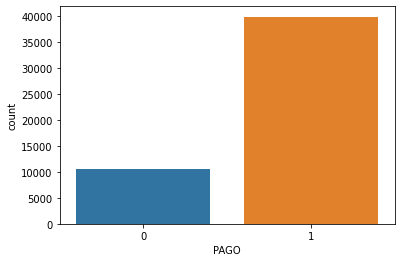

In [ ]:
sns.countplot(x="PAGO", data=base)
#AZUL NÃO PAGO
#LARANJA PAGO

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


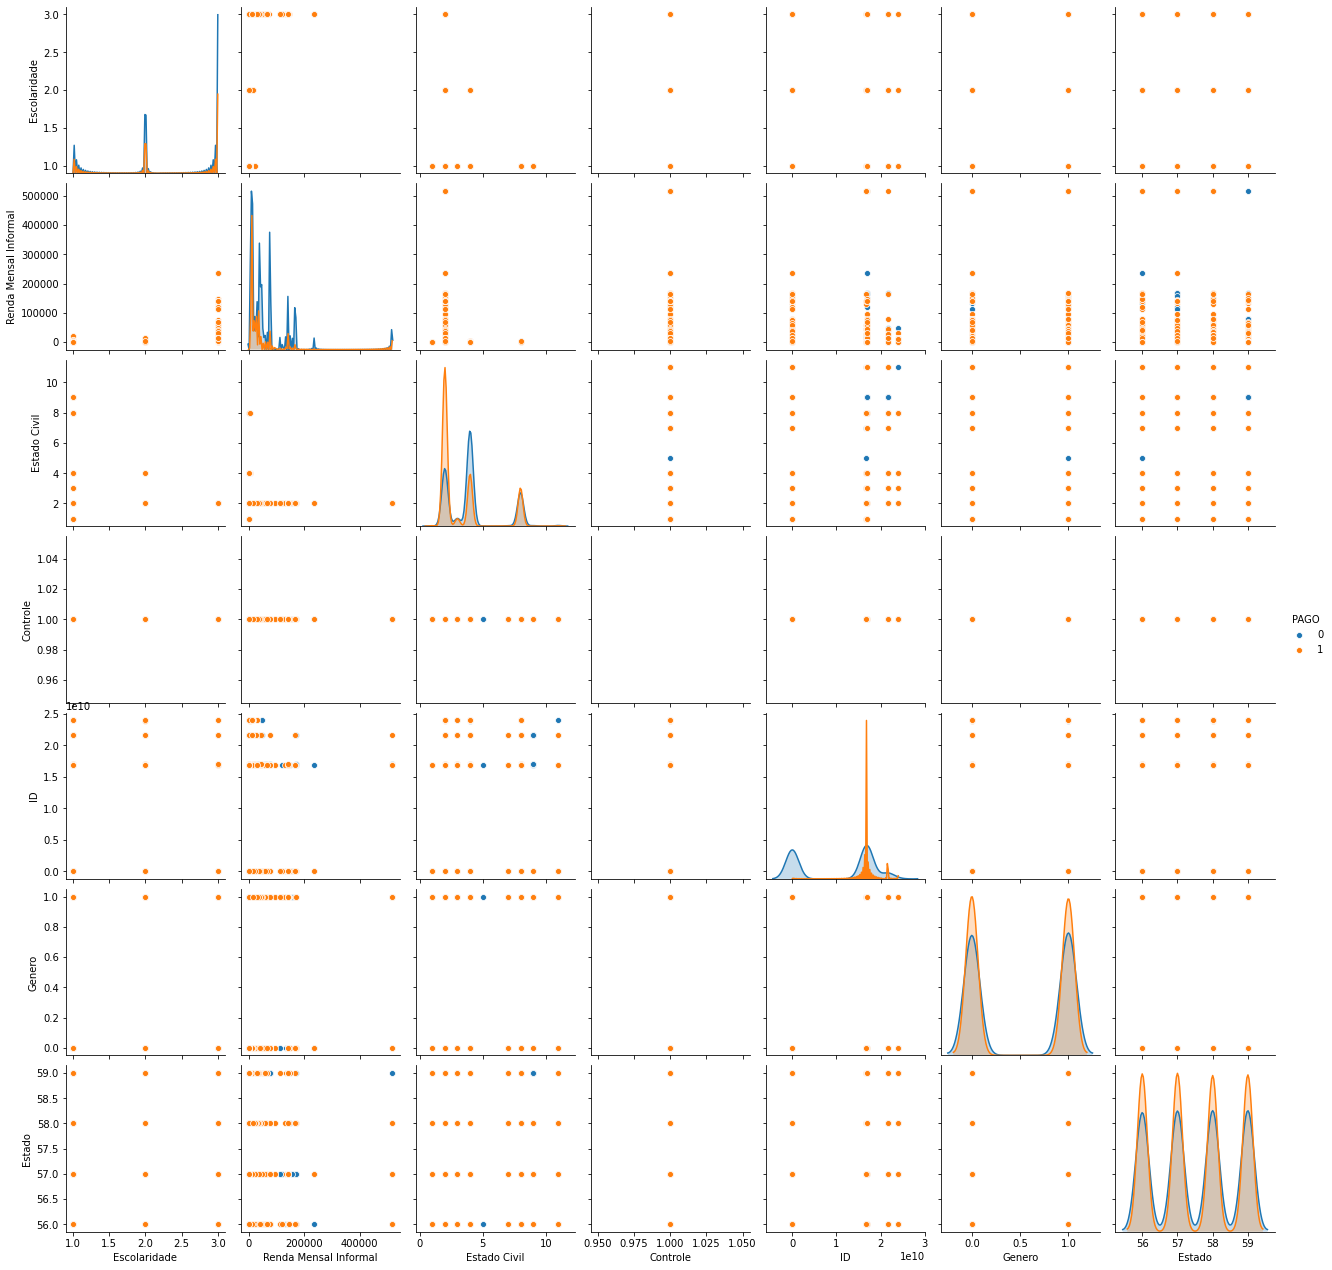

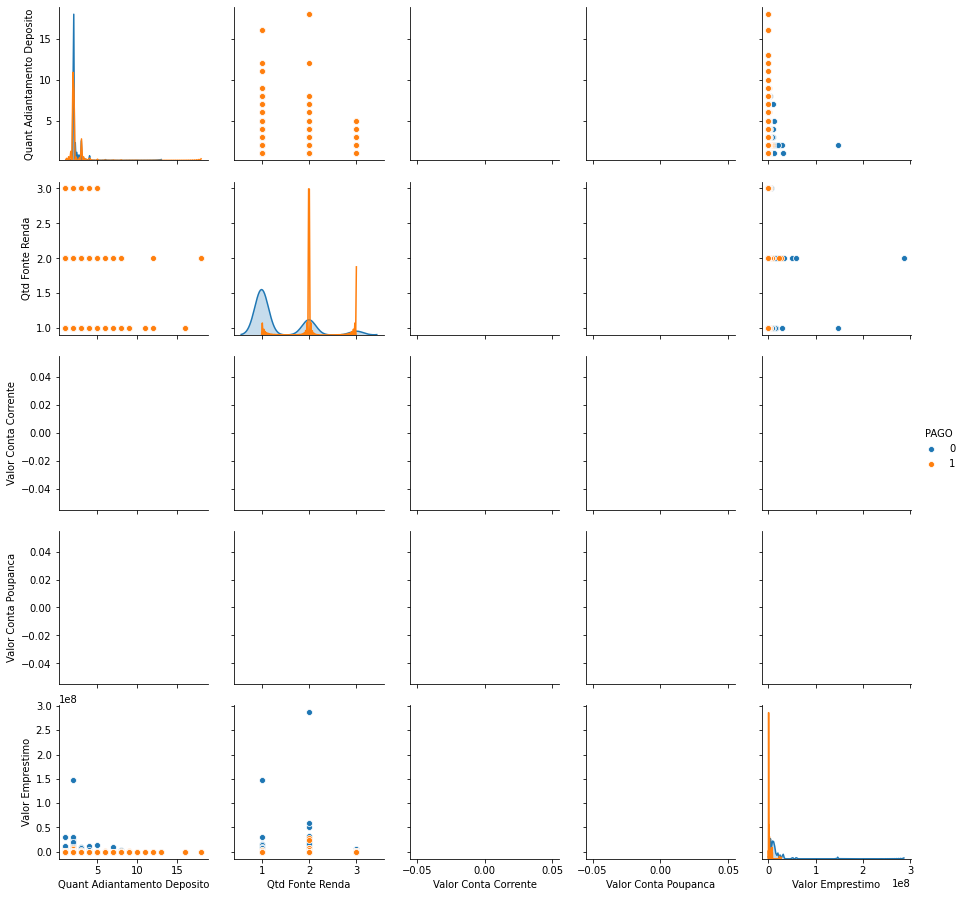

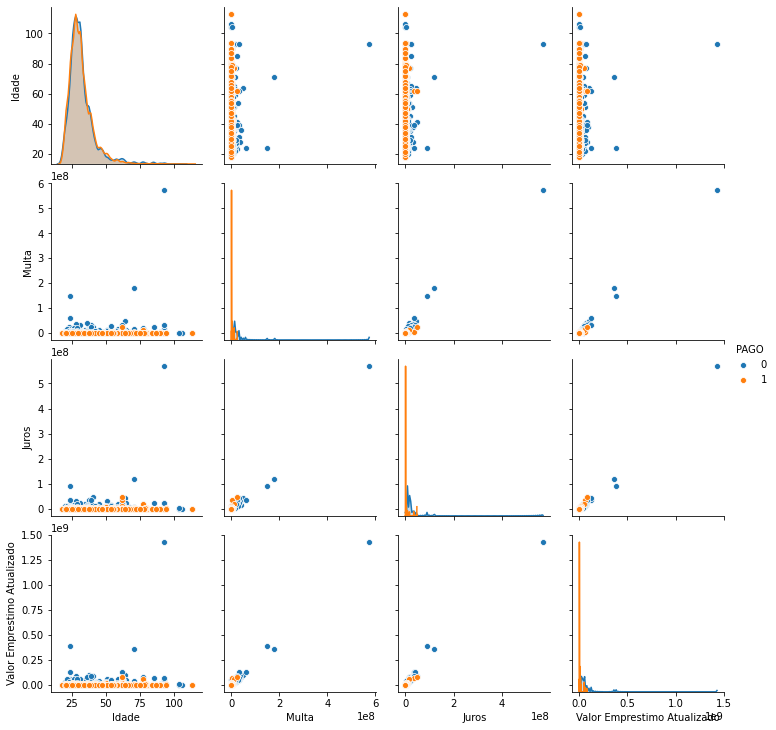

In [ ]:
sns.pairplot(base, hue='PAGO',vars=['Escolaridade', 'Renda Mensal Informal',	'Estado Civil',	'Controle',	'ID',	'Genero',	'Estado'])
sns.pairplot(base, hue='PAGO',vars=['Quant Adiantamento Deposito',	'Qtd Fonte Renda', 'Valor Conta Corrente',	'Valor Conta Poupanca',	'Valor Emprestimo'])	
sns.pairplot(base, hue='PAGO',vars=['Idade','Multa',	'Juros',	'Valor Emprestimo Atualizado'])
#,'Renda Mensal Informal',	'Estado Civil',	'Idade',	'Quant Adiantamento Deposito',	'Qtd Fonte Renda', 'Valor Conta Corrente',	'Valor Conta Poupanca',	'Valor Emprestimo',	'Multa',	'Juros',	'Valor Emprestimo Atualizado',	'PAGO',	'Controle',	'ID',	'Genero',	'Estado'   

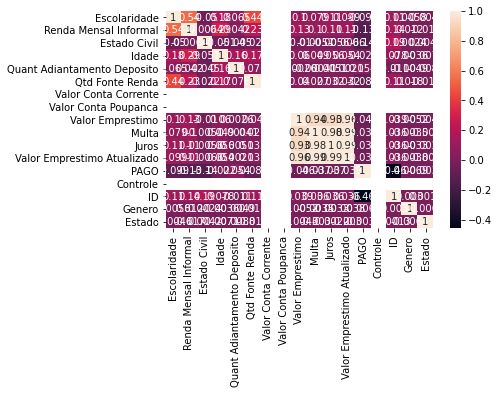

In [ ]:
sns.heatmap(base.corr(), annot=True);

# Tratamento dos dados

In [ ]:
# de acordo com os graficos anteriores, retiramos algumas colunas
base.drop('Data', 1, inplace=True)
base.drop('ID', 1, inplace=True)
base1 = base.pop('PAGO')
base["PAGO"] = base1

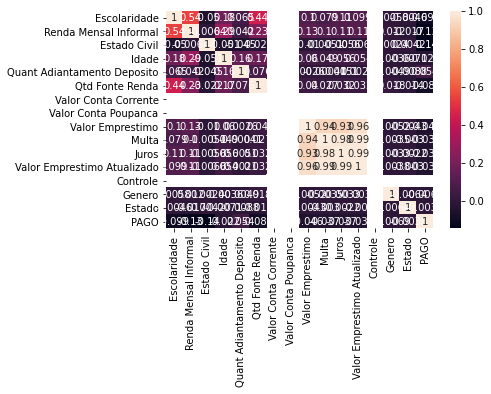

In [ ]:
sns.heatmap(base.corr(), annot=True);

In [ ]:
# de acordo com os graficos anteriores, retiramos algumas colunas
base.drop('Escolaridade', 1, inplace=True)
base.drop('Renda Mensal Informal', 1, inplace=True)
base.drop('Estado Civil', 1, inplace=True)
base1 = base.pop('PAGO')
base["PAGO"] = base1

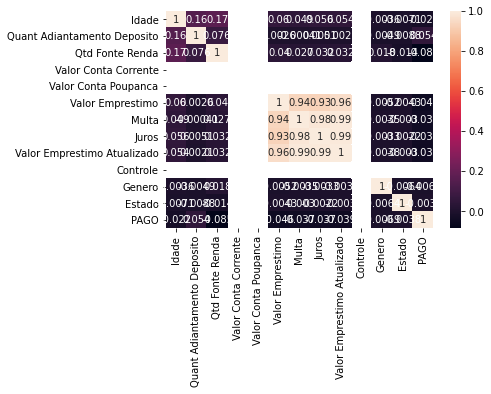

In [ ]:
sns.heatmap(base.corr(), annot=True);

In [ ]:
#ok
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50390 entries, 0 to 50389
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Dependentes                  50390 non-null  object 
 1   Idade                        50390 non-null  int64  
 2   Conta Poupanca               50390 non-null  object 
 3   Conta Salario                50390 non-null  object 
 4   Quant Adiantamento Deposito  21843 non-null  float64
 5   Qtd Fonte Renda              12806 non-null  float64
 6   Cheque Sem Fundo             50390 non-null  object 
 7   Conta Conjunta               50390 non-null  object 
 8   Valor Conta Corrente         0 non-null      float64
 9   Valor Conta Poupanca         0 non-null      float64
 10  Valor Emprestimo             50390 non-null  float64
 11  Multa                        50390 non-null  float64
 12  Juros                        50390 non-null  float64
 13  Valor Emprestimo

In [ ]:
categorical_feature_mask = base.dtypes==object 
categorical_cols = base.columns[categorical_feature_mask].tolist()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
base[categorical_cols] = base[categorical_cols].apply(lambda col: le.fit_transform(col))
base[categorical_cols].head(10)

,Dependentes,Conta Poupanca,Conta Salario,Cheque Sem Fundo,Conta Conjunta
0,1,1,0,0,0
1,0,1,0,1,0
2,1,1,0,1,0
3,0,0,0,0,0
4,1,1,0,0,0
5,0,1,0,0,0
6,0,1,0,0,0
7,1,1,0,0,0
8,0,1,0,0,0
9,0,1,0,0,0


In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50390 entries, 0 to 50389
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Dependentes                  50390 non-null  int64  
 1   Idade                        50390 non-null  int64  
 2   Conta Poupanca               50390 non-null  int64  
 3   Conta Salario                50390 non-null  int64  
 4   Quant Adiantamento Deposito  21843 non-null  float64
 5   Qtd Fonte Renda              12806 non-null  float64
 6   Cheque Sem Fundo             50390 non-null  int64  
 7   Conta Conjunta               50390 non-null  int64  
 8   Valor Conta Corrente         0 non-null      float64
 9   Valor Conta Poupanca         0 non-null      float64
 10  Valor Emprestimo             50390 non-null  float64
 11  Multa                        50390 non-null  float64
 12  Juros                        50390 non-null  float64
 13  Valor Emprestimo

# Treinamento

Mostre como foi feito treinamento

In [ ]:
base.head()

,Dependentes,Idade,Conta Poupanca,Conta Salario,Quant Adiantamento Deposito,Qtd Fonte Renda,Cheque Sem Fundo,Conta Conjunta,Valor Conta Corrente,Valor Conta Poupanca,Valor Emprestimo,Multa,Juros,Valor Emprestimo Atualizado,Controle,Genero,Estado,PAGO
0,1,36,1,0,NaN,NaN,0,0,NaN,NaN,8174.32,263.25,5844.98,14282.55,1,1,57,1
1,0,39,1,0,2.0,1.0,1,0,NaN,NaN,41775.63,1607.29,7652.26,51035.18,1,1,59,1
2,1,26,1,0,NaN,1.0,1,0,NaN,NaN,522940.27,24860.40,319315.62,867116.29,1,0,56,1
3,0,23,0,0,NaN,NaN,0,0,NaN,NaN,1593.00,21472.36,2967.48,26032.84,1,1,56,1
4,1,33,1,0,NaN,NaN,0,0,NaN,NaN,2078.97,19.44,46.35,2144.76,1,0,59,1


In [ ]:
previsores = base.iloc[:,1:15].values  ## X


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
previsores = sc.fit_transform(previsores)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:765: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:706: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


In [ ]:
previsores

array([[ 0.49917749,  0.42339716, -0.15478391, ..., -0.0216297 ,
        -0.02237043,  0.        ],
       [ 0.84943887,  0.42339716, -0.15478391, ..., -0.02096725,
        -0.01716336,  0.        ],
       [-0.66836043,  0.42339716, -0.15478391, ...,  0.09327286,
         0.09845802,  0.        ],
       ...,
       [-0.66836043,  0.42339716, -0.15478391, ..., -0.02376233,
        -0.02413693,  0.        ],
       [-0.66836043,  0.42339716, -0.15478391, ..., -0.02376099,
        -0.02401682,  0.        ],
       [-0.66836043,  0.42339716, -0.15478391, ..., -0.02376714,
        -0.02410012,  0.        ]])

In [ ]:
classe = base.iloc[:,15].values ## Y target 

In [ ]:
classe

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
from keras.utils import np_utils
classe_dummy = np_utils.to_categorical(classe)

In [ ]:
classe_dummy.shape

(50390, 2)

In [ ]:
classe_dummy #ok

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
def criar_modelo(otimizador, funcao_ativacao, neuronios, dropout, inicializador_kernel):
    classificador = Sequential()
    classificador.add(Dense(units=neuronios, activation=funcao_ativacao,
                            kernel_initializer=inicializador_kernel, input_shape=(14,)))
    classificador.add(Dropout(dropout))
    classificador.add(Dense(units=neuronios, activation=funcao_ativacao, 
                            kernel_initializer=inicializador_kernel))
    classificador.add(Dropout(dropout))
    classificador.add(Dense(units=2, activation='sigmoid'))
    classificador.compile(optimizer=otimizador, loss='categorical_crossentropy', 
                          metrics=['accuracy'])
    return classificador

classificador_base = KerasClassifier(build_fn=criar_modelo)

parametros= {'batch_size':[10,30],
             'epochs': [2000,3000],
             'dropout': [0.2, 0.3],
             'otimizador': ['adam', 'sgd'],
             'inicializador_kernel': ['random_uniform', 'normal'],
             'funcao_ativacao': ['relu', 'sigmoid', 'tanh'],
             'neuronios': [4, 8, 16]
            }

grid_search = GridSearchCV(estimator=classificador_base, param_grid=parametros, cv=2)
grid_search = grid_search.fit(previsores, classe_dummy)

Epoch 1/2000
2520/2520 [==============================] - 3s 1ms/step - loss: nan - accuracy: 0.5004
Epoch 2/2000
2520/2520 [==============================] - 3s 1ms/step - loss: nan - accuracy: 0.5004
Epoch 3/2000
2520/2520 [==============================] - 3s 1ms/step - loss: nan - accuracy: 0.5004
Epoch 4/2000
2520/2520 [==============================] - 3s 1ms/step - loss: nan - accuracy: 0.5004
Epoch 5/2000
2520/2520 [==============================] - 3s 1ms/step - loss: nan - accuracy: 0.5004
Epoch 6/2000
2520/2520 [==============================] - 3s 1ms/step - loss: nan - accuracy: 0.5004
Epoch 7/2000
2520/2520 [==============================] - 3s 1ms/step - loss: nan - accuracy: 0.5004
Epoch 8/2000
2520/2520 [==============================] - 3s 1ms/step - loss: nan - accuracy: 0.5004
Epoch 9/2000
2520/2520 [==============================] - 3s 1ms/step - loss: nan - accuracy: 0.5004
Epoch 10/2000
2520/2520 [==============================] - 3s 1ms/step - loss: nan - accura

In [ ]:
##depois executar este
melhores_parametros = grid_search.best_params_
melhor_precisao = grid_search.best_score_

In [ ]:
melhores_parametros

In [ ]:
melhor_precisao

In [ ]:
## SEPARAR DADOS DE TREINO E TESTE
from sklearn.model_selection import train_test_split 
previsoes_treinamento, previsores_teste, classe_treinamento,classe_teste = train_test_split(previsores, classe, test_size = 0.25, random_state = 0)

from sklearn.ensemble import RandomForestClassifier
classificador = RandomForestClassifier(n_estimators=10, criterion='entropy')
classificador.fit(previsoes_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

In [ ]:
previsores


In [ ]:
previsoes_treinamento

In [ ]:
classe


In [ ]:
classe_treinamento

In [ ]:
##APLICAR MODELO 
taxa_aprendizagem = 0.01
epocas = 100
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10), max_iter=epocas, learning_rate_init= taxa_aprendizagem)
mlp

# Previsão

mostre um exemplo de previsão/ sua previsão


In [ ]:
mlp.fit(previsoes_treinamento,classe_treinamento)

In [ ]:

predicoes =  mlp.predict(previsoes_treinamento)

# Avalie os resultados

Exiba precisão, acurácia, f1 score, recall

Faça considerações sobre os resultados

In [ ]:
## AVALIANDO O RESULTADO
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix (classe_teste, previsoes))
print (classification_report(classe_teste, previsoes)) 

In [ ]:
matriz = confusion_matrix(classe_teste, previsoes )
print(matriz)

In [ ]:
###___modelo anterior com KNN___###
from sklearn.metrics import classification_report
print(classification_report(classe_teste,previsoes))

A acurácia do modelo anterior é de aproximadamente 88%, o que é considerado um bom valor enquanto o novo modelo por RNA é de 88%. 
O único dado que se modifica ao apresentar o aprendizado é o "macro avg" que conduz a um estudo mais embasado. 

 . Porém não deve ser o único parâmetro a ter atenção, isso porque a acurácia é muito boa quando o dataset é simétrico, sendo a quantidade de falso positivos e falsos negativos quase iguais. Precisão é a razão entre as observações positivas previstas corretamente e o total de observações positivas previstas. Esse conceito está relacionado diretamente com a baixa taxa de falso positivos. O modelo apresentado trouxe uma precisão de 91%. O recall é a proporção de observações positivas previstas corretamente de todas as observações positivas. Um valor de 93% foi encontrado, demonstrando que que houve um grande acerto nas previsões de valores positivos, o que demonstra a eficiência do modelo.
O F1_Score é uma média hamônica entre os dois, logo, espera-se que o valor fosse alto em decorrência dos outros encontrados.